# Birth rate proyect
In this notebook we will going to analyse the data base for this proyect

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import math
import scipy

# Birth rate data paths
path_15_19 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_15_19a.csv'
path_20_34 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_20_34a.csv'
path_35_49 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_35_49a.csv'

# Income data paths
income_2016_path = r'./Data/income/2016_renda_neta_mitjana_per_persona.csv'
income_2017_path = r'./Data/income/2017_renda_neta_mitjana_per_persona.csv'
income_2018_path = r'./Data/income/2018_renda_neta_mitjana_per_persona.csv'
income_2019_path = r'./Data/income/2019_renda_neta_mitjana_per_persona.csv'
income_2020_path = r'./Data/income/2020_renda_neta_mitjana_per_persona.csv'

# Shapefiles path
barna_dist_path = r'./Data/shapefiles/BCN_UNITATS_ADM/0301040100_Districtes_UNITATS_ADM.shp'
barna_barris_path = r'./Data/shapefiles/BCN_UNITATS_ADM/0301040100_Barris_UNITATS_ADM.shp'

# Import of the files using pandas
# Import birth data
birth_15_19 = pd.read_csv(path_15_19)
birth_20_34 = pd.read_csv(path_20_34)
birth_35_49 = pd.read_csv(path_35_49)
# Import income data
income_2016 = pd.read_csv(income_2016_path)
income_2017 = pd.read_csv(income_2017_path)
income_2018 = pd.read_csv(income_2018_path)
income_2019 = pd.read_csv(income_2019_path)
income_2020 = pd.read_csv(income_2020_path)
# Import shapefiles of Barcelona
barna_dist = gpd.read_file(barna_dist_path)
barna_barris = gpd.read_file(barna_barris_path)

In [3]:
# Filterign the birth rate data for 2016-2020
birth_15_19 = birth_15_19[birth_15_19['Anys_Periode'] == '2016-2020']
birth_20_34 = birth_20_34[birth_20_34['Anys_Periode'] == '2016-2020']
birth_35_49 = birth_35_49[birth_35_49['Anys_Periode'] == '2016-2020']

# Distinguish between ages
birth_15_19['Age'] = '15-19'
birth_20_34['Age'] = '20-34'
birth_35_49['Age'] = '35-49'

birth_array = [birth_15_19, birth_20_34, birth_35_49]

# Merge the birth rate datafrmes
birth_rate_df = pd.concat(birth_array)
birth_rate_df = birth_rate_df.drop(columns='Anys_Periode')

# Change the code of the district from string to int in the shapefile
barna_dist['DISTRICTE'] = barna_dist['DISTRICTE'].astype(int)
barna_barris['DISTRICTE'] = barna_barris['DISTRICTE'].astype(int)

In [4]:
# The neighberhoods with the higher birth rate between 15 and 19 years old
birth_rate_df[birth_rate_df['Age'] == '15-19'].sort_values(by=['Nombre'], ascending=False).head(15)

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre,Age
960,3,Sants-Montjuïc,12,la Marina del Prat Vermell,36.0,15-19
998,8,Nou Barris,50,les Roquetes,22.8,15-19
995,8,Nou Barris,47,Can Peguera,21.2,15-19
1001,8,Nou Barris,53,la Trinitat Nova,16.4,15-19
994,8,Nou Barris,46,el Turó de la Peira,14.4,15-19
1002,8,Nou Barris,54,Torre Baró,14.0,15-19
1003,8,Nou Barris,55,Ciutat Meridiana,14.0,15-19
1005,9,Sant Andreu,57,la Trinitat Vella,13.8,15-19
1007,9,Sant Andreu,59,el Bon Pastor,12.5,15-19
951,1,Ciutat Vella,3,la Barceloneta,12.2,15-19


<Axes: >

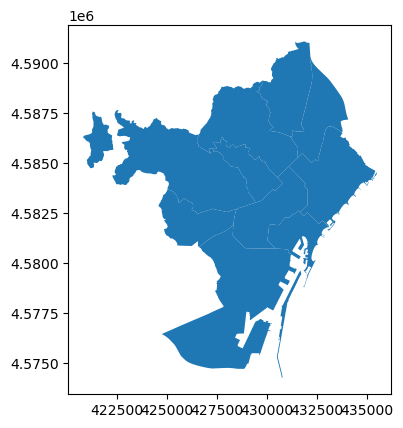

In [5]:
# Ploting the map of Barcelona per district
barna_dist.plot()

<Axes: >

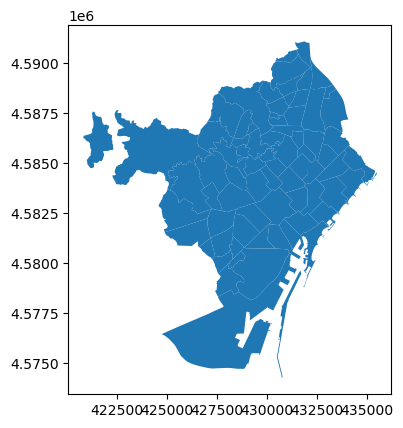

In [6]:
# Ploting Barcelona per neighberhoods
barna_barris.plot()

In [36]:
birth_rate_df

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre,Age
949,1,Ciutat Vella,1,el Raval,11.5,15-19
950,1,Ciutat Vella,2,el Barri Gòtic,2.7,15-19
951,1,Ciutat Vella,3,la Barceloneta,12.2,15-19
952,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",7.0,15-19
953,2,Eixample,5,el Fort Pienc,1.7,15-19
...,...,...,...,...,...,...
1017,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,37.9,35-49
1018,10,Sant Martí,70,el Besòs i el Maresme,25.2,35-49
1019,10,Sant Martí,71,Provençals del Poblenou,31.8,35-49
1020,10,Sant Martí,72,Sant Martí de Provençals,25.4,35-49


In [24]:
# Mean birth rate per district
birth_dist = birth_rate_df.groupby(['Nom_Districte', 'Codi_Districte'], as_index = False)['Nombre'].agg('mean')
birth_dist

,Nom_Districte,Codi_Districte,Nombre
0,Ciutat Vella,1,19.608333
1,Eixample,2,22.338889
2,Gràcia,6,25.000000
3,Horta-Guinardó,7,27.278788
4,Les Corts,4,25.211111
5,Nou Barris,8,29.841026
6,Sant Andreu,9,29.614286
7,Sant Martí,10,26.713333
8,Sants-Montjuïc,3,28.191667
9,Sarrià-Sant Gervasi,5,26.750000


In [23]:
# Mean birth rate per district in teens
birth_dist_teen = birth_15_19.groupby(['Nom_Districte', 'Codi_Districte'], as_index = False)['Nombre'].agg('mean')
birth_dist_teen

,Nom_Districte,Codi_Districte,Nombre
0,Ciutat Vella,1,8.350000
1,Eixample,2,1.950000
2,Gràcia,6,2.480000
3,Horta-Guinardó,7,2.872727
4,Les Corts,4,1.166667
5,Nou Barris,8,11.130769
6,Sant Andreu,9,7.285714
7,Sant Martí,10,3.140000
8,Sants-Montjuïc,3,9.450000
9,Sarrià-Sant Gervasi,5,1.166667


(420079.1488400004, 436213.74996000016, 4573443.271199999, 4591905.2048)

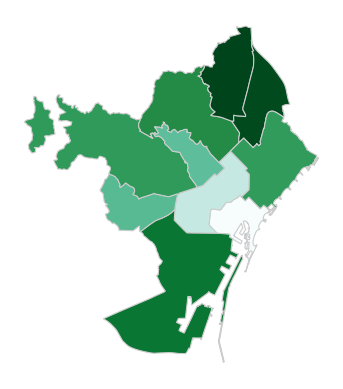

In [37]:
# Merge the mean birth rate df with the shapefile df
barna_dist_birth = barna_dist.merge(birth_dist, left_on = 'DISTRICTE', right_on = 'Codi_Districte')
#variable = 'Nombre'

#fig, ax= plt.subplot(1, figsize = (10, 6))
barna_dist_birth.plot(column = 'Nombre', cmap = 'BuGn', linewidth = 0.8, edgecolor = '0.8')
plt.axis('off')


(420079.1488400004, 436213.74996000016, 4573443.271199999, 4591905.2048)

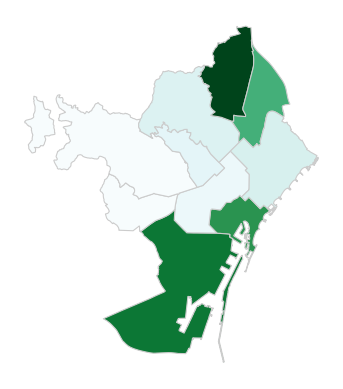

In [38]:
# Merge mean birth rate in teens with the shapefile
barna_dist_teen = barna_dist.merge(birth_dist_teen, left_on = 'DISTRICTE', right_on = 'Codi_Districte')
barna_dist_teen.plot(column = 'Nombre', cmap = 'BuGn', linewidth = 0.8, edgecolor = '0.8')
plt.axis('off')
